In [171]:
# !pip install opencv-python

In [172]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import imghdr

In [173]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [174]:
data_dir = 'data'
img_ext = ['jpeg','jgp','png','bmp']

In [175]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '1687d86811a2c25b877448ed47218131.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile-svg_.png',
 '35438_hd.jpg',
 '360_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '383627315.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976-mv2.png',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL-_AC_UF1000-1000_QL80_.jpg',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '960x0.jpg',
 'aa-happy-people.jpg',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Senior-citizens-on-holiday-22143350.jpg',
 'business-people-succesful-celebrating-group-successful-39416.jpg',
 'Copy-of-Rustic-Female-Teen-Magazine-Cover.jpg',
 'Couple_Happy_money_062618.jpg',


In [176]:
os.path.join(data_dir, 'happy','05-12-21-happy-people.jpg')

'data\\happy\\05-12-21-happy-people.jpg'

(880, 1400, 3)


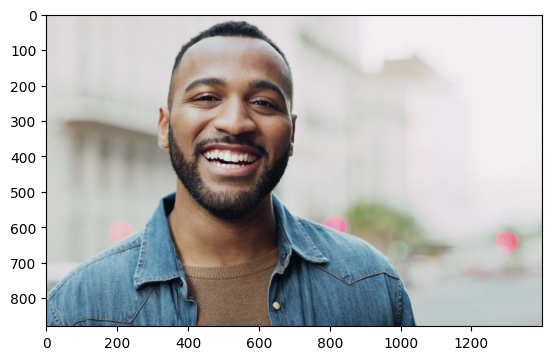

In [177]:
#show sample image
image = cv2.imread('data\\happy\\05-12-21-happy-people.jpg') 
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [178]:
for image_label in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_label)):
        image_path = os.path.join(data_dir, image_label, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image{}'.format(image_path))

In [179]:
print(len(os.listdir(os.path.join(data_dir, 'happy'))))
print(len(os.listdir(os.path.join(data_dir, 'sad'))))

214
190


# load data

In [180]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [181]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [182]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 403 files belonging to 2 classes.


In [183]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [184]:
# images in numpy arrays (batches, size, size, rgb) (0: happy, 1: sad)
batch[0].shape

(32, 256, 256, 3)

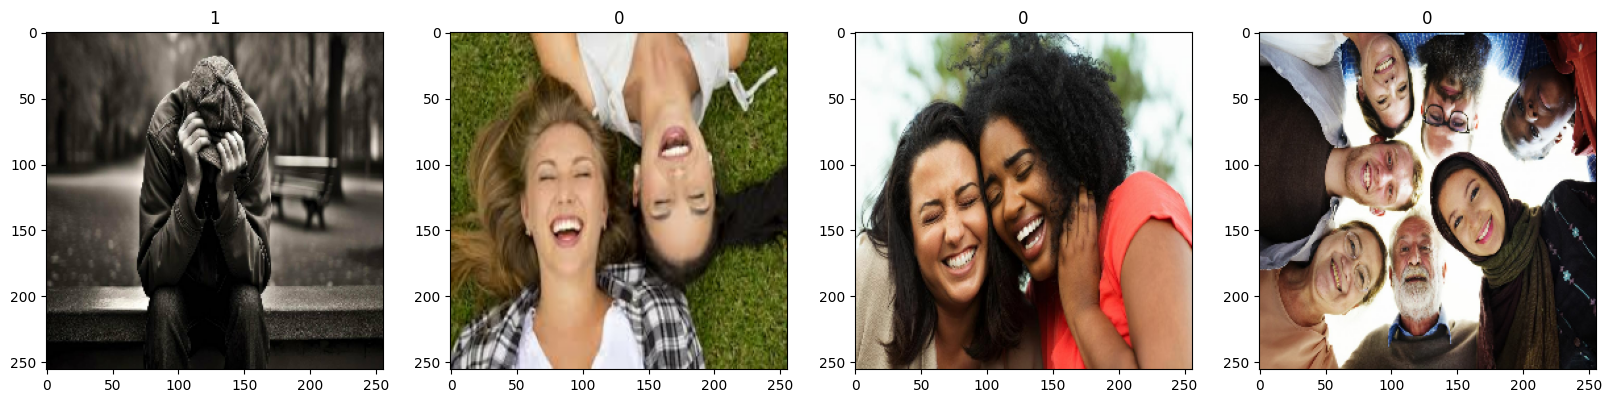

In [185]:
fig, ax = plt.subplots(1,4, figsize = (20,20))
for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])

# data preprocess

In [186]:
batch[0].max()

255.0

In [187]:
scaled_data = data.map(lambda x,y: (x/255, y))

In [188]:
scaled_iter = scaled_data.as_numpy_iterator()

In [189]:
scaled_batch = scaled_iter.next()

In [190]:
scaled_batch[0].min()

0.0

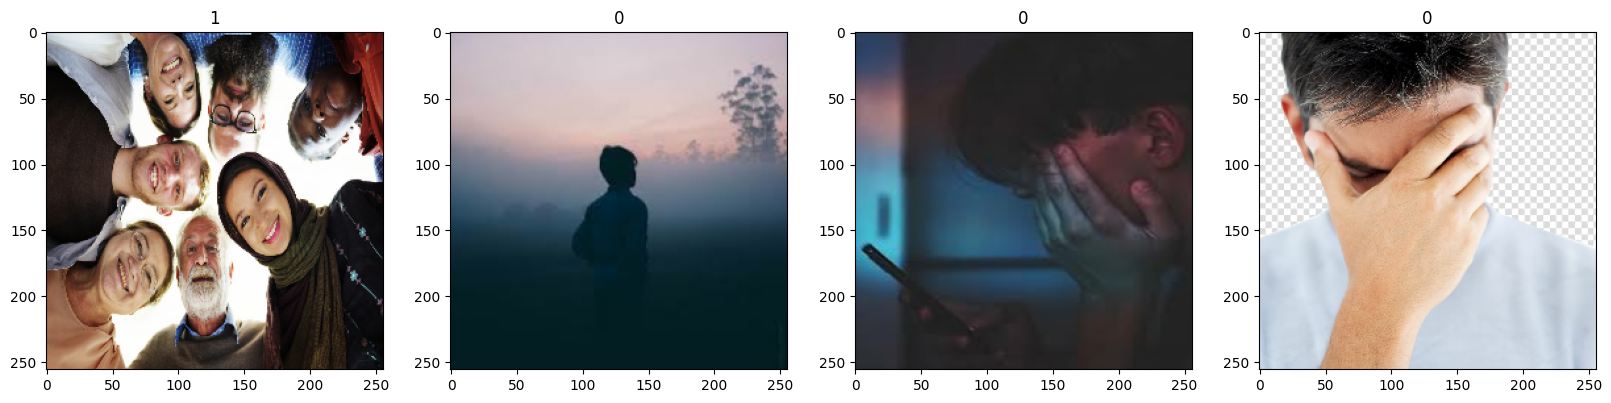

In [191]:
fig, ax = plt.subplots(1,4, figsize = (20,20))
for i, img in enumerate(scaled_batch[0][:4]):
    ax[i].imshow(img)
    ax[i].title.set_text(batch[1][i])

In [192]:
len(scaled_data)

13

In [193]:
train_size = int(len(scaled_data)*0.7)
val_size = int(len(scaled_data)*0.2)
test_size = int(len(scaled_data)*0.1) +1
print(train_size, val_size, test_size)

9 2 2


In [194]:
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

# training

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import callbacks

conv -> maxpooling -> conv -> maxpooling -> conv -> maxpooling -> flatten

In [196]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [197]:
model = Sequential([
    Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\DzakiyFaridFadhilah\anaconda3\envs\python_10\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [198]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [199]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [200]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

hist = model.fit(train, epochs=30, validation_data= val, callbacks= early_stopping)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 386ms/step - accuracy: 0.5577 - loss: 0.8353 - val_accuracy: 0.7812 - val_loss: 0.6337
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.7702 - loss: 0.6085 - val_accuracy: 0.7031 - val_loss: 0.5516
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.7448 - loss: 0.5531 - val_accuracy: 0.7969 - val_loss: 0.4604
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.8262 - loss: 0.4303 - val_accuracy: 0.8125 - val_loss: 0.4372
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.8817 - loss: 0.3389 - val_accuracy: 0.8750 - val_loss: 0.2894
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.8595 - loss: 0.3866 - val_accuracy: 0.9375 - val_loss: 0.2234
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.9032 - loss: 0.2831 - val_accuracy: 0.9688 - val_loss: 0.1490
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.9445 - loss: 0.1846 - val_accuracy: 0.9531 - val_loss:

In [201]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.510417,0.912590,0.531250,0.679246
1,0.631944,0.643884,0.671875,0.577392
2,0.711806,0.556887,0.796875,0.507043
3,0.767361,0.501067,0.937500,0.404514
4,0.847222,0.405277,0.906250,0.275284
5,0.836806,0.347091,0.859375,0.314362
6,0.916667,0.267713,0.906250,0.206684
7,0.927083,0.188296,0.906250,0.182525
8,0.927083,0.172683,0.953125,0.136266
9,0.975694,0.104369,1.000000,0.059016


<Axes: title={'center': 'Accuracy'}>

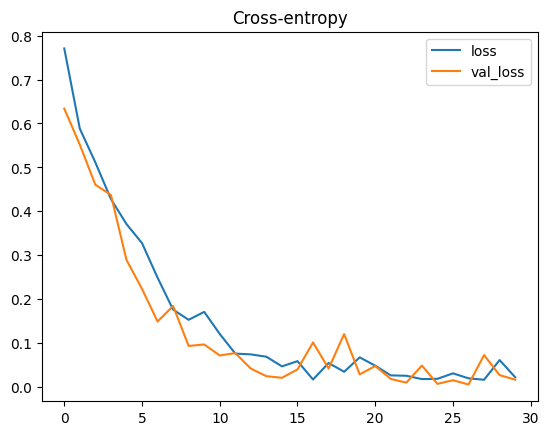

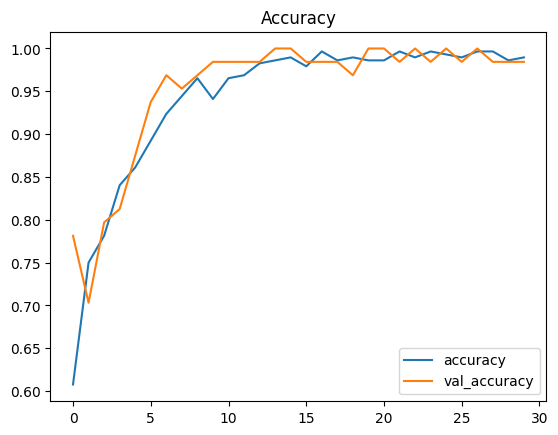

In [202]:
history_df = pd.DataFrame(hist.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

# evaluate

In [203]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pres = Precision()
rec = Recall()
accu = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X_test, y_test = batch
    y_pred = model.predict(X_test)
    pres.update_state(y_test, y_pred)
    rec.update_state(y_test, y_pred)
    accu.update_state(y_test, y_pred)

print(f'precision: {pres.result().numpy()}\nRecall: {rec.result().numpy()},\nAccuracy: {accu.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
precision: 1.0
Recall: 1.0,
Accuracy: 1.0


# test

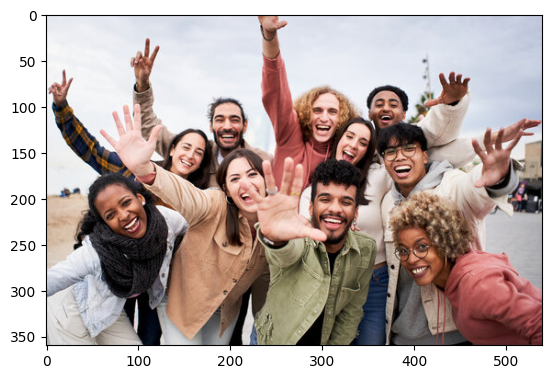

In [204]:
test_image = cv2.imread('happy_test.jpg')
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()

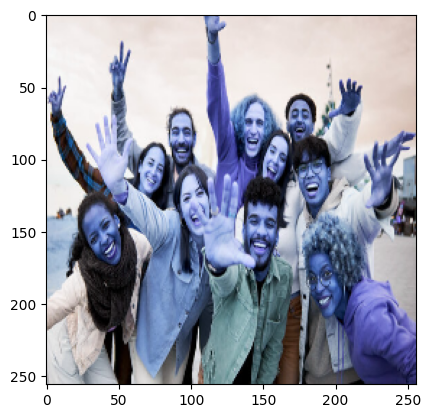

In [205]:
resize = tf.image.resize(test_image, (256,256))
plt.imshow(resize.numpy().astype(int))

In [206]:
resize.shape

TensorShape([256, 256, 3])

In [207]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [208]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [209]:
yhat

array([[0.000222]], dtype=float32)

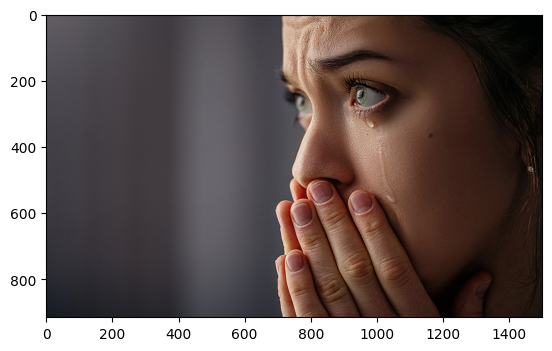

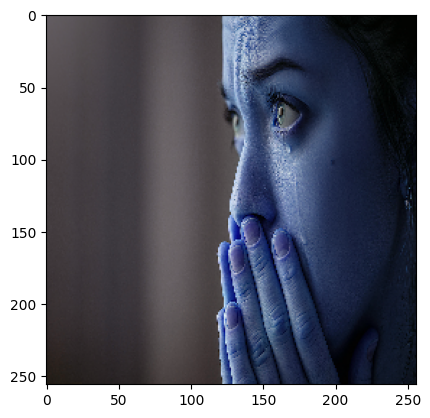

In [210]:
test_image2 = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(test_image2, cv2.COLOR_BGR2RGB))
plt.show()
resize2 = tf.image.resize(test_image2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [211]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))
(yhat2 > 0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[1]])

In [215]:
yhat2 = model.predict(np.expand_dims(resize3/255, 0))
(yhat2 > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[1]])